<a href="https://colab.research.google.com/github/Redwoods/pdm00/blob/master/py-tensorflow/DL1-FCN/mnist05_FCN_test_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DNN (Deep Neural Networks) 구현 방법
> - Sequential model
> - Functional model
> - Subclassing model

# **Test of mnist FCN model**
## Sequential model
- FCN2
- FCN3
- FCN4
- FCN5

***

![mnist_NN_2_layers](https://raw.githubusercontent.com/Redwoods/Py/master/pdm2020/my-note/py-tensorflow/images/mnist_NN_2_layers.png)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.6.0


## **데이터 로딩, 정규화**

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test.shape))

X_train=(60000, 28, 28)
y_train=(60000,)
X_test=(10000, 28, 28)
y_test=(10000,)


In [ ]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## **FCN2**

In [ ]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn2 = keras.models.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

fcn2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
fcn2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fcn2.fit(X_train, y_train, 
         epochs = 20,  
         batch_size = 100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 5s 4ms/step - loss: 0.3881 - accuracy: 0.8886 - val_loss: 0.1856 - val_accuracy: 0.9446
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1892 - accuracy: 0.9454 - val_loss: 0.1276 - val_accuracy: 0.9623
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1437 - accuracy: 0.9582 - val_loss: 0.1044 - val_accuracy: 0.9694
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1188 - accuracy: 0.9652 - val_loss: 0.0899 - val_accuracy: 0.9735
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1023 - accuracy: 0.9699 - val_loss: 0.0841 - val_accuracy: 0.9742
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0908 - accuracy: 0.9726 - val_loss: 0.0778 - val_accuracy: 0.9765
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0816 - accuracy: 0.9748 - val_loss: 0.0807 - val_accuracy: 0.9749
Epoch 

In [ ]:
fcn2.evaluate(X_test, y_test, batch_size =100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0669 - accuracy: 0.9805


[0.06685808300971985, 0.9804999828338623]

## **FCN3**

In [ ]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn3 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
fcn3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
________________________________________________

In [ ]:
fcn3.fit(X_train,y_train, epochs= 20 , batch_size =100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 0.3509 - accuracy: 0.8950 - val_loss: 0.1295 - val_accuracy: 0.9592
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1498 - accuracy: 0.9557 - val_loss: 0.0951 - val_accuracy: 0.9694
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1114 - accuracy: 0.9669 - val_loss: 0.0785 - val_accuracy: 0.9744
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0886 - accuracy: 0.9736 - val_loss: 0.0736 - val_accuracy: 0.9770
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0758 - accuracy: 0.9761 - val_loss: 0.0731 - val_accuracy: 0.9770
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0668 - accuracy: 0.9790 - val_loss: 0.0654 - val_accuracy: 0.9800
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0585 - accuracy: 0.9813 - val_loss: 0.0676 - val_accuracy: 0.9789
Epoch 

In [ ]:
fcn3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0643 - accuracy: 0.9844


[0.06428982317447662, 0.9843999743461609]

## **FCN4**

In [ ]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn4 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
fcn4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)               

In [ ]:
fcn4.fit(X_train, y_train, epochs = 20 , batch_size =100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 4s 5ms/step - loss: 0.4134 - accuracy: 0.8761 - val_loss: 0.1422 - val_accuracy: 0.9570
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1768 - accuracy: 0.9504 - val_loss: 0.1042 - val_accuracy: 0.9672
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1309 - accuracy: 0.9627 - val_loss: 0.0953 - val_accuracy: 0.9699
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1112 - accuracy: 0.9678 - val_loss: 0.0756 - val_accuracy: 0.9754
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0934 - accuracy: 0.9728 - val_loss: 0.0819 - val_accuracy: 0.9749
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0826 - accuracy: 0.9761 - val_loss: 0.0689 - val_accuracy: 0.9803
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0733 - accuracy: 0.9783 - val_loss: 0.0685 - val_accuracy: 0.9797
Epoch 

In [ ]:
fcn4.evaluate(X_test, y_test, batch_size =100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0672 - accuracy: 0.9820


[0.06720948964357376, 0.9819999933242798]

## **FCN5**

In [ ]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn5 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
fcn5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)               

In [ ]:
fcn5.fit(X_train, y_train, epochs=20, batch_size =100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 4s 5ms/step - loss: 0.5933 - accuracy: 0.8191 - val_loss: 0.1700 - val_accuracy: 0.9510
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.2305 - accuracy: 0.9403 - val_loss: 0.1199 - val_accuracy: 0.9667
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1787 - accuracy: 0.9550 - val_loss: 0.1070 - val_accuracy: 0.9706
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1473 - accuracy: 0.9623 - val_loss: 0.0920 - val_accuracy: 0.9756
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1308 - accuracy: 0.9665 - val_loss: 0.0954 - val_accuracy: 0.9758
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1094 - accuracy: 0.9712 - val_loss: 0.0849 - val_accuracy: 0.9769
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1029 - accuracy: 0.9729 - val_loss: 0.0778 - val_accuracy: 0.9795
Epoch 

In [ ]:
fcn5.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0844 - accuracy: 0.9815


[0.08438233286142349, 0.9815000295639038]

# **[DIY] Hidden layer에 따른 정확도**

In [ ]:
fcn2.evaluate(X_test, y_test, batch_size = 100)
fcn3.evaluate(X_test, y_test, batch_size = 100)
fcn4.evaluate(X_test, y_test, batch_size = 100)
fcn5.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0844 - accuracy: 0.9815


[0.08438233286142349, 0.9815000295639038]

In [ ]:
fcn_result = [[0.0669, 0.9805], 
 [0.0643, 0.9844], 
 [0.0672, 0.9820], 
 [0.0844, 0.9815]]

In [ ]:
# select accuracies
accuracy = [row[1] for row in fcn_result]
accuracy

[0.9805, 0.9844, 0.982, 0.9815]

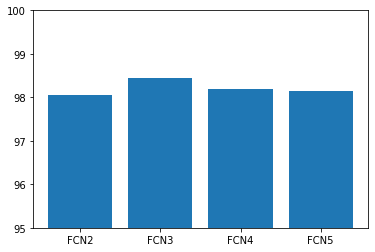

In [ ]:
x = np.arange(4)
fcns = ['FCN2','FCN3','FCN4','FCN5']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, fcns)
plt.ylim((95,100))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [ ]:
fcn3.save('fcn3_best.hdf5')

In [ ]:
from keras.models import load_model

model = load_model('fcn3_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0643 - accuracy: 0.9844


[0.06428982317447662, 0.9843999743461609]

---